# Web Scraping The Onion's YouTube Channel
- This notebook contains the following technologies:
    - Web Scraping, Natural Language Processing, Data Manipulation, Data Visuliation

In [86]:
# Imports
from selenium import webdriver
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to C:\Users\Johnny
[nltk_data]     Simmons\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Johnny
[nltk_data]     Simmons\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Using Selenium to webscrape the data we want from The Onion's Youtube Channel

In [87]:
url = 'https://www.youtube.com/c/TheOnion/videos'
chrome_driver_path = r'C:\Users\Johnny Simmons\AppData\Local\Programs\Python\Python38-32\chromedriver.exe'

driver = webdriver.Chrome(executable_path=chrome_driver_path)
driver.get(url)

videos= driver.find_elements_by_class_name('style-scope ytd-grid-video-renderer')

video_list = [] #Blank list

for v in videos:
    title = v.find_element_by_xpath('.//*[@id="video-title"]').text
    views = v.find_element_by_xpath('.//*[@id="metadata-line"]/span[1]').text
    when = v.find_element_by_xpath('.//*[@id="metadata-line"]/span[2]').text
    vid_item = {
        'title': title,
        'views': views,
        'posted': when
    }
    video_list.append(vid_item)
# Converting data from a list into a dataframe
df = pd.DataFrame(video_list)
driver.quit()

### Cleaning Data
- Splitting each word from the 'title' column

In [88]:
# What the DataFrame looks like
df

,title,views,posted
0,Disney World On Lockdown After Mickey Escapes ...,47K views,6 days ago
1,Real Estate Experts Confirm Having George Cloo...,36K views,1 week ago
2,Diary Entries Reveal Ben Franklin’s Kite Exper...,49K views,2 weeks ago
3,Huge Quantities Of Primo Sh*t Incinerated By Feds,30K views,3 weeks ago
4,Zoologists Thrilled After Successfully Getting...,95K views,1 month ago
5,"Bee, Man Allergic To Bees Found Dead In Appare...",68K views,1 month ago
6,The Onion Reviews ‘Mulan’,137K views,1 month ago
7,New Identification App Lets Hikers Categorize ...,53K views,1 month ago
8,Severely Injured Woman Heroically Fights Off P...,160K views,1 month ago
9,NASA Announces Plans To Launch Chimpanzee Into...,98K views,2 months ago


In [89]:
#This splits all the sentences up which makes it easier for us to work with
title_list = []

for word in df['title']:
    title_list.append(word)
    
title_list

['Disney World On Lockdown After Mickey Escapes Enclosure, Rampages Through Park',
 'Real Estate Experts Confirm Having George Clooney Living In Attic Greatly Increases Property Value',
 'Diary Entries Reveal Ben Franklin’s Kite Experiment Was Early Attempt At Erotic Electrostimulation',
 'Huge Quantities Of Primo Sh*t Incinerated By Feds',
 'Zoologists Thrilled After Successfully Getting Pair Of Bengal Tigers To 69 In Captivity',
 'Bee, Man Allergic To Bees Found Dead In Apparent Murder-Suicide',
 'The Onion Reviews ‘Mulan’',
 'New Identification App Lets Hikers Categorize All Corpses They Encounter On Nature Trail',
 'Severely Injured Woman Heroically Fights Off Paramedics Trying To Force Her Into Medical Debt',
 'NASA Announces Plans To Launch Chimpanzee Into Sun',
 'Nation’s CEOs Sign Pledge To Continue F**king Over Americans',
 'Prison Guards Gun Down Inmate Trying To Escape Jail Through Transportive Power Of Reading',
 'Victoria’s Secret Closes After Concluding Women Were Never H

In [90]:
# Breaks each word into its own string
lines = list()
for line in title_list:    
    words = line.split()
    for w in words: 
       lines.append(w)
print(lines)

['Disney', 'World', 'On', 'Lockdown', 'After', 'Mickey', 'Escapes', 'Enclosure,', 'Rampages', 'Through', 'Park', 'Real', 'Estate', 'Experts', 'Confirm', 'Having', 'George', 'Clooney', 'Living', 'In', 'Attic', 'Greatly', 'Increases', 'Property', 'Value', 'Diary', 'Entries', 'Reveal', 'Ben', 'Franklin’s', 'Kite', 'Experiment', 'Was', 'Early', 'Attempt', 'At', 'Erotic', 'Electrostimulation', 'Huge', 'Quantities', 'Of', 'Primo', 'Sh*t', 'Incinerated', 'By', 'Feds', 'Zoologists', 'Thrilled', 'After', 'Successfully', 'Getting', 'Pair', 'Of', 'Bengal', 'Tigers', 'To', '69', 'In', 'Captivity', 'Bee,', 'Man', 'Allergic', 'To', 'Bees', 'Found', 'Dead', 'In', 'Apparent', 'Murder-Suicide', 'The', 'Onion', 'Reviews', '‘Mulan’', 'New', 'Identification', 'App', 'Lets', 'Hikers', 'Categorize', 'All', 'Corpses', 'They', 'Encounter', 'On', 'Nature', 'Trail', 'Severely', 'Injured', 'Woman', 'Heroically', 'Fights', 'Off', 'Paramedics', 'Trying', 'To', 'Force', 'Her', 'Into', 'Medical', 'Debt', 'NASA', 'An

In [91]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines] # Using Regular expression to remove punctuation

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [92]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# i.e. "run" has a alot of different variations (running, runner, ran)...
# ...and we want to break it down to the root word of "run"

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['disney',
 'world',
 'on',
 'lockdown',
 'after',
 'mickey',
 'escap',
 'enclosur',
 'rampag',
 'through',
 'park',
 'real',
 'estat',
 'expert',
 'confirm',
 'have',
 'georg',
 'clooney',
 'live',
 'in',
 'attic',
 'great',
 'increas',
 'properti',
 'valu',
 'diari',
 'entri',
 'reveal',
 'ben',
 'franklin',
 'kite',
 'experi',
 'was',
 'earli',
 'attempt',
 'at',
 'erot',
 'electrostimul',
 'huge',
 'quantiti',
 'of',
 'primo',
 'sht',
 'inciner',
 'by',
 'fed',
 'zoologist',
 'thrill',
 'after',
 'success',
 'get',
 'pair',
 'of',
 'bengal',
 'tiger',
 'to',
 '69',
 'in',
 'captiv',
 'bee',
 'man',
 'allerg',
 'to',
 'bee',
 'found',
 'dead',
 'in',
 'appar',
 'murdersuicid',
 'the',
 'onion',
 'review',
 'mulan',
 'new',
 'identif',
 'app',
 'let',
 'hiker',
 'categor',
 'all',
 'corps',
 'they',
 'encount',
 'on',
 'natur',
 'trail',
 'sever',
 'injur',
 'woman',
 'heroic',
 'fight',
 'off',
 'paramed',
 'tri',
 'to',
 'forc',
 'her',
 'into',
 'medic',
 'debt',
 'nasa',
 'announ

In [93]:
# Removing all Stop Words (i.e. "a", "the", "or")

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['disney',
 'world',
 'lockdown',
 'mickey',
 'escap',
 'enclosur',
 'rampag',
 'park',
 'real',
 'estat',
 'expert',
 'confirm',
 'georg',
 'clooney',
 'live',
 'attic',
 'great',
 'increas',
 'properti',
 'valu',
 'diari',
 'entri',
 'reveal',
 'ben',
 'franklin',
 'kite',
 'experi',
 'earli',
 'attempt',
 'erot',
 'electrostimul',
 'huge',
 'quantiti',
 'primo',
 'sht',
 'inciner',
 'fed',
 'zoologist',
 'thrill',
 'success',
 'pair',
 'bengal',
 'tiger',
 '69',
 'captiv',
 'bee',
 'man',
 'allerg',
 'bee',
 'found',
 'dead',
 'appar',
 'murdersuicid',
 'onion',
 'review',
 'mulan',
 'new',
 'identif',
 'app',
 'let',
 'hiker',
 'categor',
 'corps',
 'encount',
 'natur',
 'trail',
 'sever',
 'injur',
 'woman',
 'heroic',
 'fight',
 'paramed',
 'tri',
 'forc',
 'medic',
 'debt',
 'nasa',
 'announc',
 'plan',
 'launch',
 'chimpanze',
 'sun',
 'nation',
 'ceo',
 'sign',
 'pledg',
 'continu',
 'fking',
 'american',
 'prison',
 'guard',
 'gun',
 'inmat',
 'tri',
 'escap',
 'jail',
 'tran

### Exlporing Data

In [94]:
dfWordCount = pd.DataFrame(stem2)
dfWordCount = dfWordCount[0].value_counts() # Counting each word

In [95]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in dfWordCount:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 211, 2: 21, 3: 3, 4: 2, 9: 1})

In [96]:
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Interactive Data Visualizations
- Below consists of visualizing the data based off the word count from the video titles

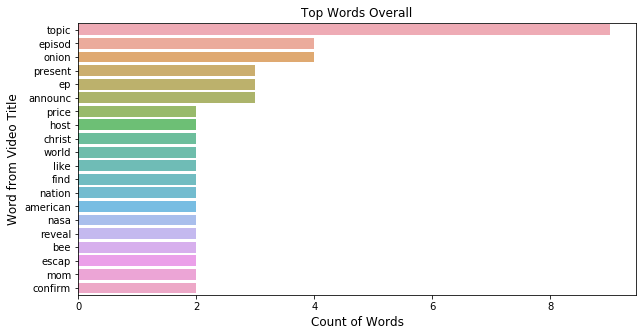

In [97]:
#This is a simple plot that shows the top 20 words being used in the Video Titles

dfTopWords = dfWordCount[:20,]
plt.figure(figsize=(10,5))
sns.barplot(dfTopWords.values, dfTopWords.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Video Title', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [98]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
# Spacy breaks the words down into categories (People, Places, organizations)

In [99]:
# A function to display basic entity info:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [100]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

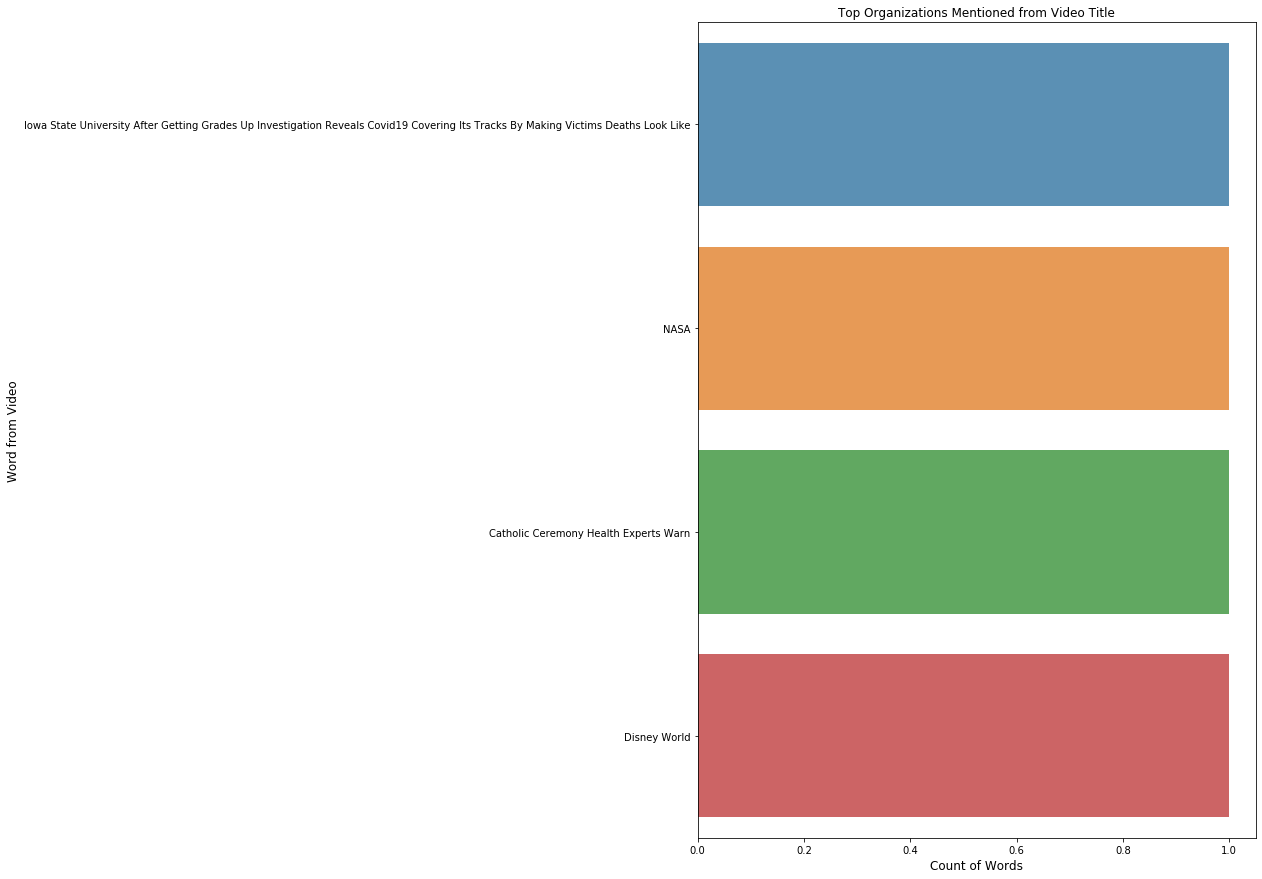

In [101]:
dfOrg = df7
plt.figure(figsize=(10,15))
sns.barplot(dfOrg.values, dfOrg.index, alpha=0.8)
plt.title('Top Organizations Mentioned from Video Title')
plt.ylabel('Word from Video', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

- Does identify some organizations but does not seem to seperate "Iowa State University" from the rest of its video title

In [102]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

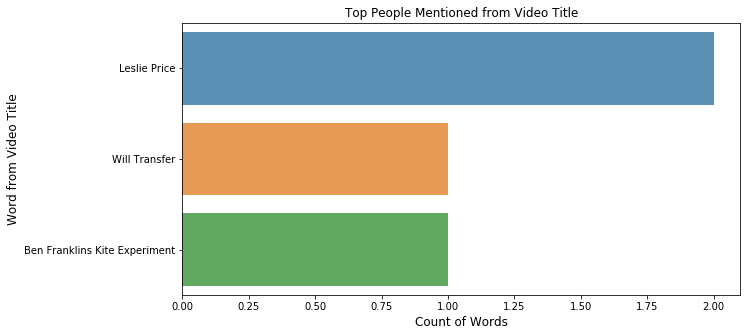

In [103]:
dfPeople = df11
plt.figure(figsize=(10,5))
sns.barplot(dfPeople.values, dfPeople.index, alpha=0.8)
plt.title('Top People Mentioned from Video Title')
plt.ylabel('Word from Video Title', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

- Again, not perfect, but it does identify some people!

In [104]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df13 = pd.DataFrame(label, columns = ['Word','Entity'])

df13 = df13.where(df13['Entity'] == 'CARDINAL')

df14 = df13['Word'].value_counts()

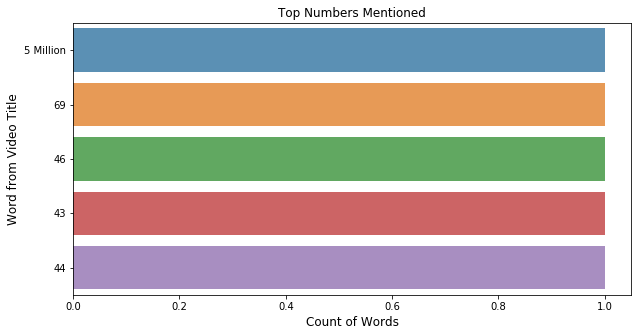

In [105]:
dfNum = df14
plt.figure(figsize=(10,5))
sns.barplot(dfNum.values, dfNum.index, alpha=0.8)
plt.title('Top Numbers Mentioned')
plt.ylabel('Word from Video Title', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

### Cleaning Data
- Converting the 'view' and 'posted' columns into numeric data to use for graphs

In [106]:
dfVP = df.copy() # Cleaning up the views and posted values

In [107]:
dfVP['views'] = dfVP.views.str.replace(r'\D','') # getting rid of "K views" in 'views' column
dfVP['views'] = pd.to_numeric(dfVP['views']) # Converting string to int
dfVP['views'] = dfVP['views'].apply(lambda x: x*1000) # Converting view numbers to 1,000's
#dfVP

In [108]:
# Splitting the data from the 'posted' for further analysis
split_data = dfVP['posted'].str.split(" ")
posted_data = split_data.to_list()
names = ['posted (weeks ago)', 'Unit of Measure', 'ago']
new_df = pd.DataFrame(posted_data, columns=names)

In [109]:
dfVP = pd.concat([dfVP, new_df], axis=1)

In [110]:
dfVP # Updated Dataframe

,title,views,posted,posted (weeks ago),Unit of Measure,ago
0,Disney World On Lockdown After Mickey Escapes ...,47000,6 days ago,6,days,ago
1,Real Estate Experts Confirm Having George Cloo...,36000,1 week ago,1,week,ago
2,Diary Entries Reveal Ben Franklin’s Kite Exper...,49000,2 weeks ago,2,weeks,ago
3,Huge Quantities Of Primo Sh*t Incinerated By Feds,30000,3 weeks ago,3,weeks,ago
4,Zoologists Thrilled After Successfully Getting...,95000,1 month ago,1,month,ago
5,"Bee, Man Allergic To Bees Found Dead In Appare...",68000,1 month ago,1,month,ago
6,The Onion Reviews ‘Mulan’,137000,1 month ago,1,month,ago
7,New Identification App Lets Hikers Categorize ...,53000,1 month ago,1,month,ago
8,Severely Injured Woman Heroically Fights Off P...,160000,1 month ago,1,month,ago
9,NASA Announces Plans To Launch Chimpanzee Into...,98000,2 months ago,2,months,ago


In [111]:
dfVP['posted (weeks ago)'] = pd.to_numeric(dfVP['posted (weeks ago)']) # Converting string to Float

In [112]:
#dfVP.dtypes # Checking the type

In [113]:
# Function that allows user to decide how to convert 'U/M' to the same unit
# I decided to convert all the views to weeks
def cleanup(dfEX, columnname, othercolumn, certainString, multiplier):
    dfEX[columnname] = np.where(dfEX[othercolumn] == certainString,
                                           dfEX[columnname] * multiplier,
                                           dfEX[columnname])

In [114]:
cleanup(dfVP, 'posted (weeks ago)', 'Unit of Measure', 'months', 4)
cleanup(dfVP, 'posted (weeks ago)', 'Unit of Measure', 'month', 4)
cleanup(dfVP, 'posted (weeks ago)', 'Unit of Measure', 'days', 1/7)

In [115]:
dfVP.drop(['Unit of Measure', 'ago'], axis=1, inplace=True)

In [116]:
dfVP # Updated Dataframe

,title,views,posted,posted (weeks ago)
0,Disney World On Lockdown After Mickey Escapes ...,47000,6 days ago,0.857143
1,Real Estate Experts Confirm Having George Cloo...,36000,1 week ago,1.000000
2,Diary Entries Reveal Ben Franklin’s Kite Exper...,49000,2 weeks ago,2.000000
3,Huge Quantities Of Primo Sh*t Incinerated By Feds,30000,3 weeks ago,3.000000
4,Zoologists Thrilled After Successfully Getting...,95000,1 month ago,4.000000
5,"Bee, Man Allergic To Bees Found Dead In Appare...",68000,1 month ago,4.000000
6,The Onion Reviews ‘Mulan’,137000,1 month ago,4.000000
7,New Identification App Lets Hikers Categorize ...,53000,1 month ago,4.000000
8,Severely Injured Woman Heroically Fights Off P...,160000,1 month ago,4.000000
9,NASA Announces Plans To Launch Chimpanzee Into...,98000,2 months ago,8.000000


### Interactive Data Visualizations
- Below consists of visualizing the data based off the views of each video and when the video was posted

Text(0, 0.5, 'Density')

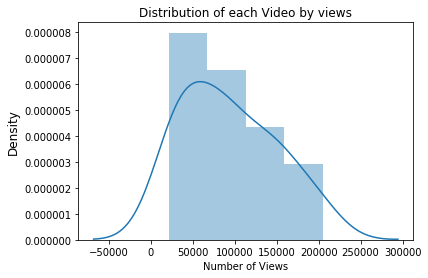

In [117]:
sns.distplot(dfVP['views'], axlabel ="Number of Views")
plt.title('Distribution of each Video by views')
plt.ylabel('Density', fontsize=12)

- The distrubiton is skewed to the right somewhat but still holds a bell curve (like) shape

Text(0, 0.5, 'Density')

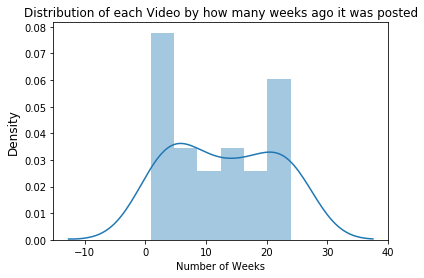

In [118]:
sns.distplot(dfVP['posted (weeks ago)'], bins=6, axlabel='Number of Weeks')
plt.title('Distribution of each Video by how many weeks ago it was posted')
plt.ylabel('Density', fontsize=12)

-  The number of weeks since a vdieo was posted has a Bimodal distribution

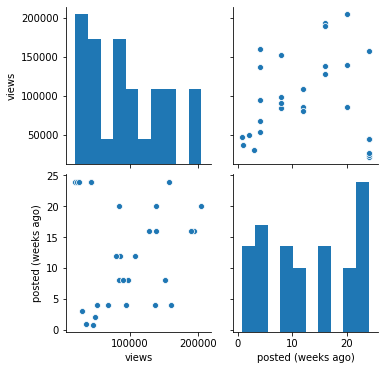

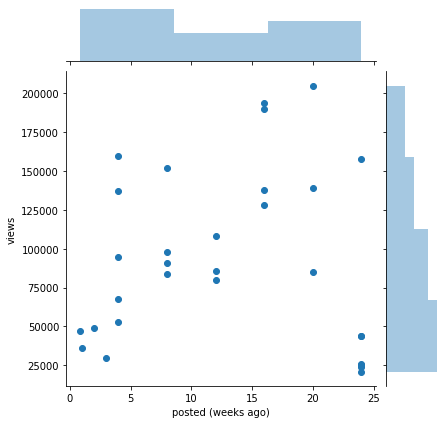

In [119]:
sns.pairplot(dfVP)
sns.jointplot(x='posted (weeks ago)',y='views',data=dfVP)

- I wanted to run pairplot to see the coorelation between views and how long the video was posted
- There is somewhat a linear coorelation but there still seems to be outliers/ not a diect coorelation
- There may be other data I am missing to determine the view count